## Predict the price of Gold

This is from the website: https://www.quantinsti.com/blog/gold-price-prediction-using-machine-learning-python/

In [1]:
# LinearRegression is a machine learning library for linear regression 

from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 

import pandas as pd 

import numpy as np 

# matplotlib and seaborn are used for plotting graphs 

import matplotlib.pyplot as plt 

import seaborn 

# fix_yahoo_finance is used to fetch data 

import fix_yahoo_finance as yf

/Users/charliedang/anaconda3/lib/python3.6/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


[*********************100%***********************]  1 of 1 downloaded

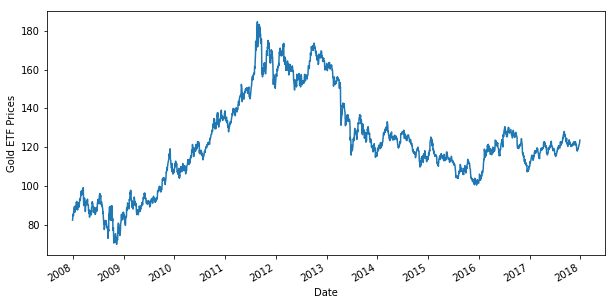

In [2]:
# Read data 

Df = yf.download('GLD','2008-01-01','2017-12-31')

# Only keep close columns 

Df=Df[['Close']] 

# Drop rows with missing values 

Df= Df.dropna() 

# Plot the closing price of GLD 

Df.Close.plot(figsize=(10,5)) 

plt.ylabel("Gold ETF Prices")

plt.show()

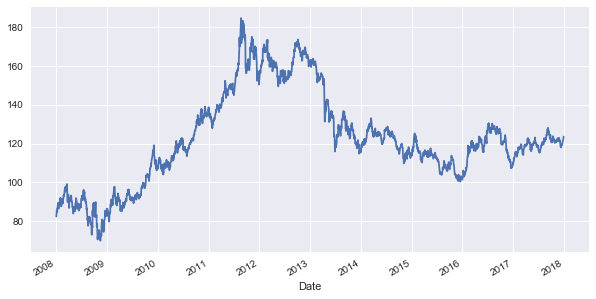

In [7]:
import seaborn as sns
sns.set()

Df['Close'].plot(figsize = (10,5), grid = True)

plt.show()

In [11]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 

Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 

Df= Df.dropna() 

X = Df[['S_3','S_9']] 

X.head()

,S_3,S_9
Date,,
2008-01-28,89.423335,88.287777
2008-01-29,90.710002,88.533333
2008-01-30,91.066668,88.884444
2008-01-31,91.653333,89.480000
2008-02-01,91.536667,90.024445


In [12]:
y = Df['Close']

y.head()


Date
2008-01-28    91.750000
2008-01-29    91.150002
2008-01-30    92.059998
2008-01-31    91.400002
2008-02-01    89.349998
Name: Close, dtype: float64

In [13]:
t=.8 

t = int(t*len(Df)) 

# Train dataset 

X_train = X[:t] 

y_train = y[:t]  

# Test dataset 

X_test = X[t:] 

y_test = y[t:]

**The linear regression equation:**

$ Y = \alpha_{1}X_{1}+\alpha_{2}X_{2}+\alpha_{0}$

Gold ETF price = $\alpha_{1}$ * 3 days moving average + $\alpha_{2}$ * 15 days moving average + $\alpha_{0}$

In [18]:
linear = LinearRegression().fit(X_train,y_train) 

print ("Gold ETF Price =", round(linear.coef_[0],2), 

"* 3 Days Moving Average", round(linear.coef_[1],2), 

"* 9 Days Moving Average +", round(linear.intercept_,2))

Gold ETF Price = 1.2 * 3 Days Moving Average -0.2 * 9 Days Moving Average + 0.37


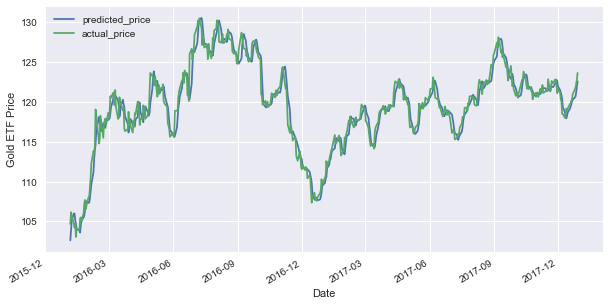

In [19]:
predicted_price = linear.predict(X_test)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold ETF Price")  

plt.show()

In [20]:
r2_score = linear.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))


94.82

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

lg = LinearRegression()

# Fit
lg.fit(X_, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

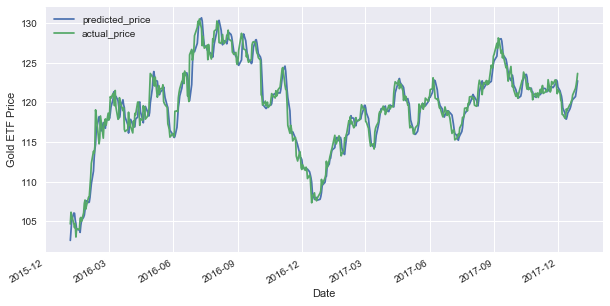

In [41]:
predicted_price = lg.predict(X_test_)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold ETF Price")  

plt.show()

In [34]:
predicted_price

array([102.47756215, 103.73208294, 104.9744868 , 105.94194187,
       105.9023948 , 105.04249177, 104.56316646, 103.83125436,
       103.75233639, 103.44128675, 104.36221339, 104.94916511,
       105.38415334, 105.64087137, 106.30164798, 107.339177  ,
       107.43223318, 107.21122753, 107.2503982 , 107.81806833,
       108.67127943, 109.56860145, 111.17190601, 112.92136798,
       114.02396752, 114.69990173, 116.56247165, 118.28178579,
       118.22597809, 116.50092163, 116.24288235, 117.27613995,
       117.23165971, 116.68379572, 116.61625731, 117.65474649,
       117.64437294, 117.96708021, 117.83959203, 118.4890899 ,
       119.28383809, 120.31510572, 121.25169648, 121.09272559,
       120.62939446, 120.65134245, 120.13731339, 119.4281946 ,
       118.03167881, 118.49758918, 119.41878257, 120.22017515,
       119.58271031, 119.25010459, 118.06780549, 117.08506901,
       116.05879496, 116.87430934, 117.25330945, 117.73807716,
       117.05970408, 116.74098129, 116.79013408, 116.78

In [42]:
Df

,Close,S_3,S_9
Date,,,
2008-01-28,91.750000,89.423335,88.287777
2008-01-29,91.150002,90.710002,88.533333
2008-01-30,92.059998,91.066668,88.884444
2008-01-31,91.400002,91.653333,89.480000
2008-02-01,89.349998,91.536667,90.024445
2008-02-04,89.099998,90.936666,90.238889
2008-02-05,87.680000,89.949999,90.342222
2008-02-06,88.949997,88.709999,90.318889
2008-02-07,89.849998,88.576665,90.193333


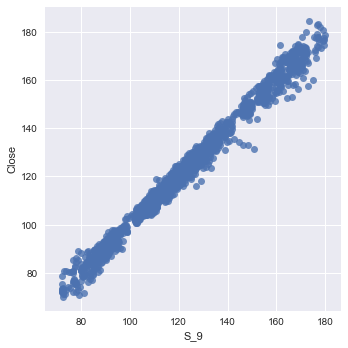

In [45]:
sns.lmplot('S_9', 'Close', data=Df, fit_reg=False)

plt.show()

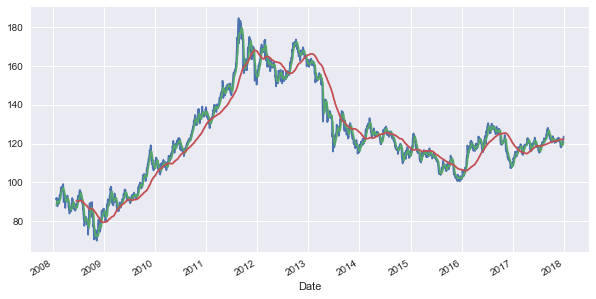

In [63]:
Df.Close.plot(figsize=(10,5))
Df['S_9'].plot(figsize=(10,5))
Df['S_100'].plot(figsize=(10,5))

plt.show()

In [62]:
Df['S_100']= Df['Close'].shift(1).rolling(window=100).mean()